In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# water

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

path= r'C:\Users\Iman\Google Drive\4. BGSU\1.2 PhD_Courses\1. 6260_Visualization\Project\Project 4\Data\water_Clean_Midden_Oakwoods_Data.csv'
df_water = pd.read_csv(path, dtype={"TN":'category'})
df_water.dtypes

sampleMedia              object
sampleID                 object
visitDate               float64
TN                     category
TP                       object
disNH4                   object
disNO3                   object
disPO4                   object
locName                  object
Pool Volume (cu ft)     float64
samp_notes               object
y                       float64
x                       float64
dtype: object

In [5]:
df_water_clean = df_water.dropna(thresh=5).replace('< MDL', np.nan).replace('<MDL', np.nan).replace('lost sample', np.nan)
df_water_clean = df_water_clean.astype({
"sampleMedia"         :     object,
"sampleID"            :     object,
"visitDate"           :    np.float64,
"TN"                  :   np.float64,
"TP"                  :     np.float64,
"disNH4"              :     np.float64,
"disNO3"              :     np.float64,
"disPO4"              :     np.float64,
"locName"             :     object,
"Pool Volume (cu ft)" :    np.float64,
"samp_notes"          :     object,
"y"                   :    np.float64,
"x"                   :    np.float64,
})
df_water_clean.visitDate = (pd.to_datetime(df_water_clean.visitDate,format= "%Y%m%d"))
df_water_clean.head(1)

,sampleMedia,sampleID,visitDate,TN,TP,disNH4,disNO3,disPO4,locName,Pool Volume (cu ft),samp_notes,y,x
0,water,W00043,2021-05-27,3.365,0.598,0.138,NaN,0.133,Wetland Pool 25,15000.0,NaN,41.0239,-83.68451


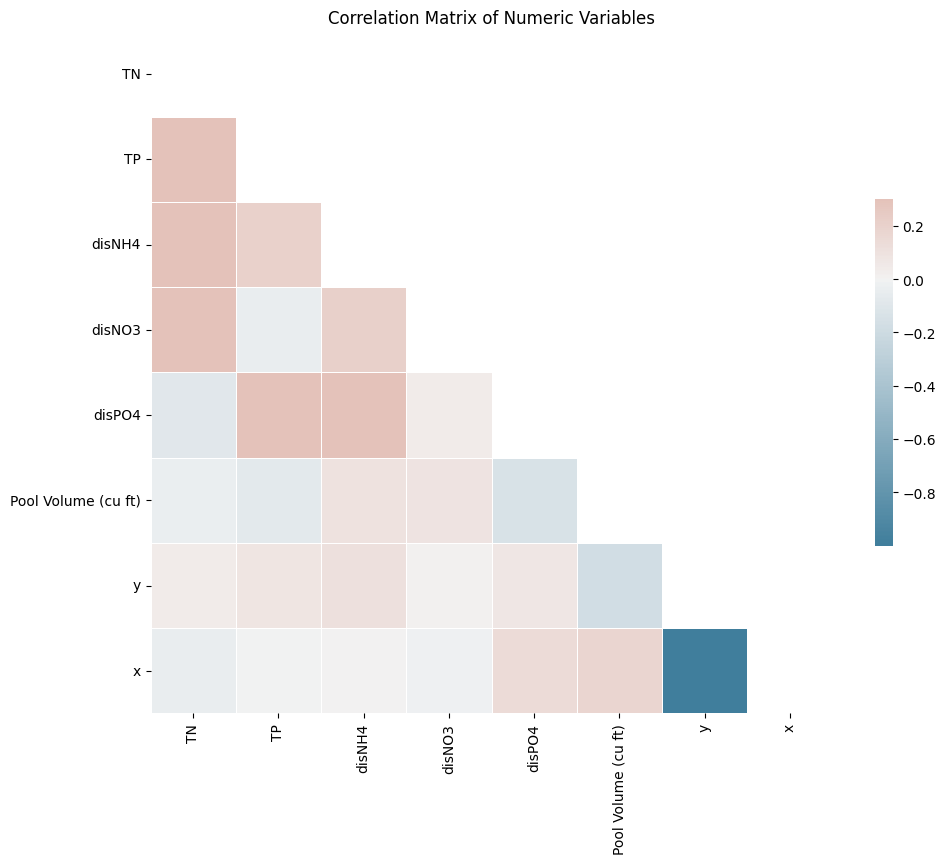

In [6]:

numeric_df = df_water_clean.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

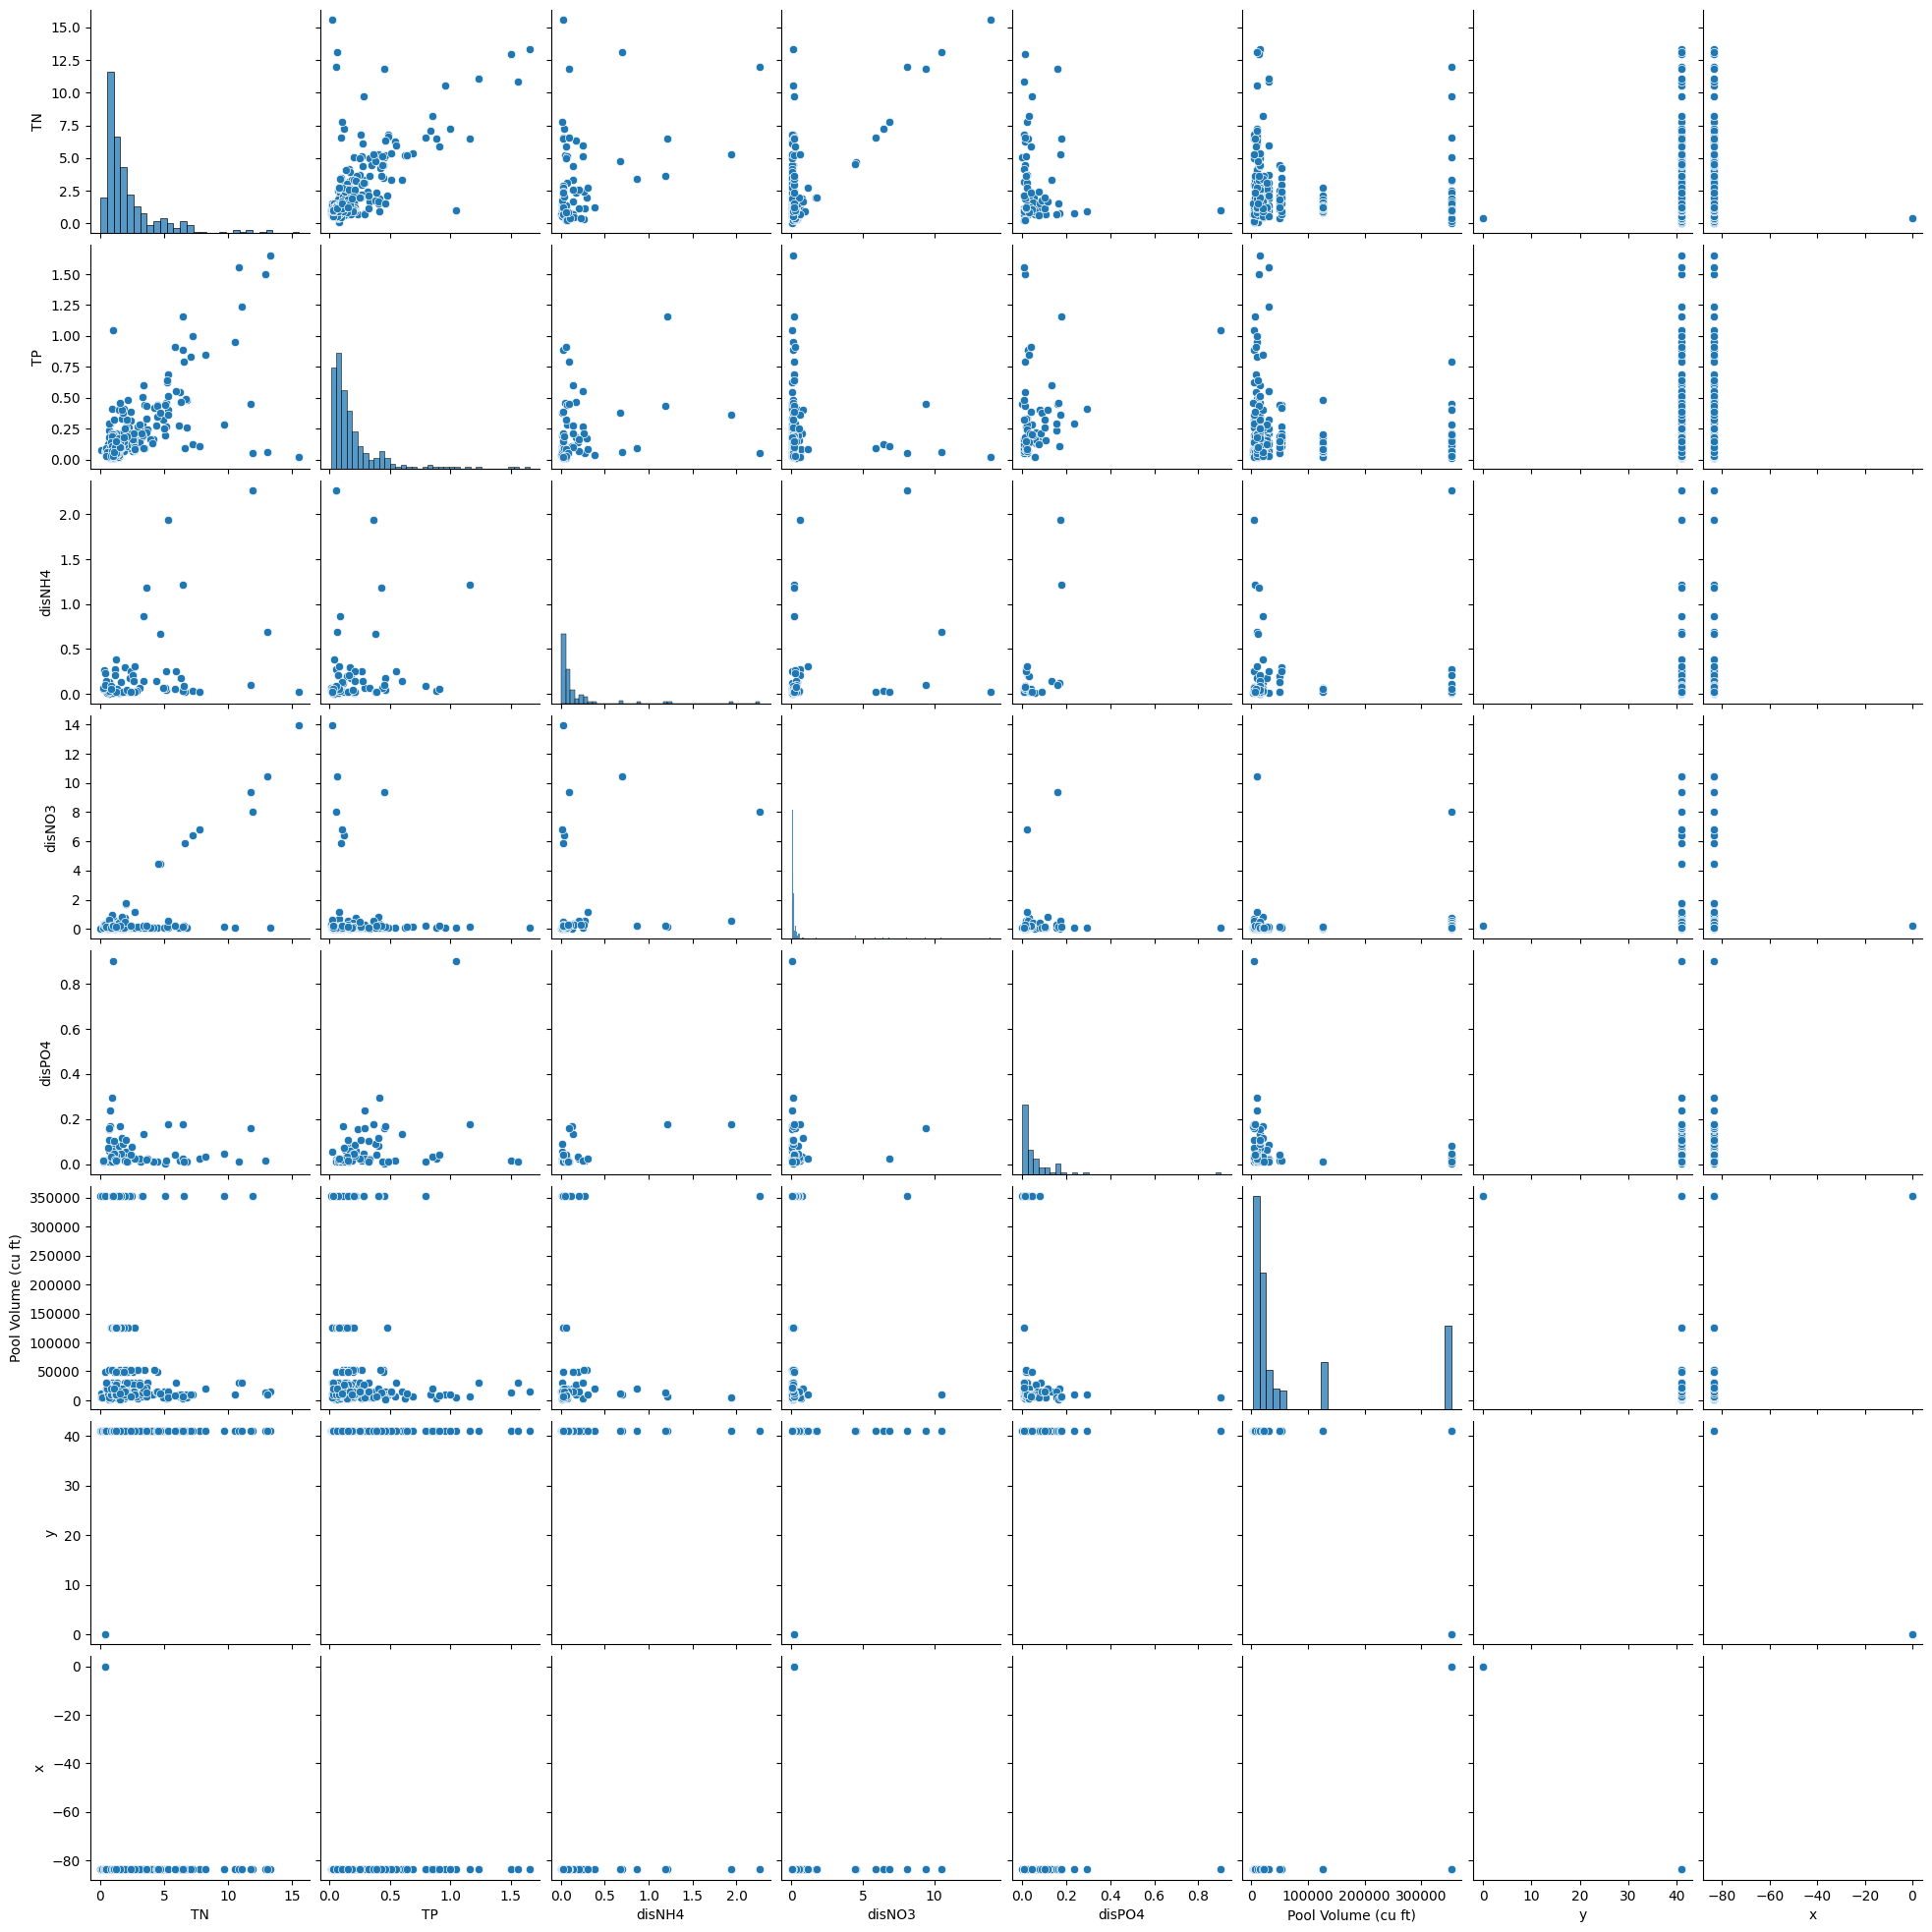

In [7]:
sns.pairplot(numeric_df)

plt.show()


In [8]:
df = numeric_df.iloc[:,0:5]
corr2= df.corr()
corr2

,TN,TP,disNH4,disNO3,disPO4
TN,1.000000,0.665471,0.392562,0.651172,-0.091496
TP,0.665471,1.000000,0.202233,-0.046556,0.298195
disNH4,0.392562,0.202233,1.000000,0.209944,0.602617
disNO3,0.651172,-0.046556,0.209944,1.000000,0.037240
disPO4,-0.091496,0.298195,0.602617,0.037240,1.000000


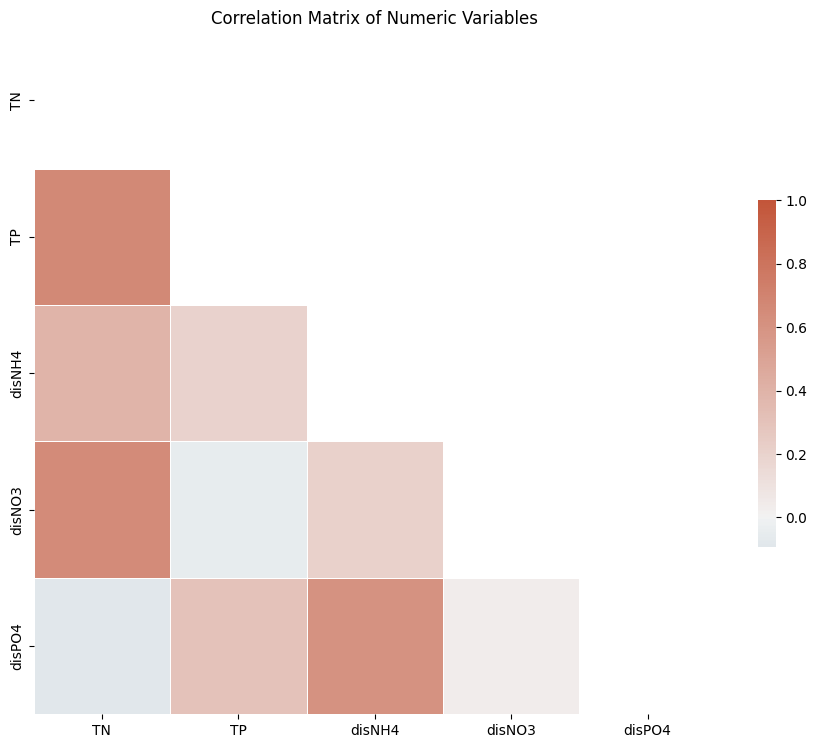

In [25]:
mask = np.triu(np.ones_like(corr2, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [10]:
df.describe()

,TN,TP,disNH4,disNO3,disPO4
count,317.000000,299.000000,90.000000,240.000000,83.000000
mean,2.306243,0.196682,0.176409,0.445144,0.063054
std,2.429867,0.241994,0.365095,1.568750,0.109516
min,0.014000,0.009000,0.004000,0.010000,0.001300
25%,0.880000,0.061000,0.028000,0.059150,0.015250
50%,1.379000,0.120000,0.058500,0.105800,0.026400
75%,2.651609,0.210500,0.142950,0.171578,0.069950
max,15.570000,1.655000,2.268900,13.945200,0.902500


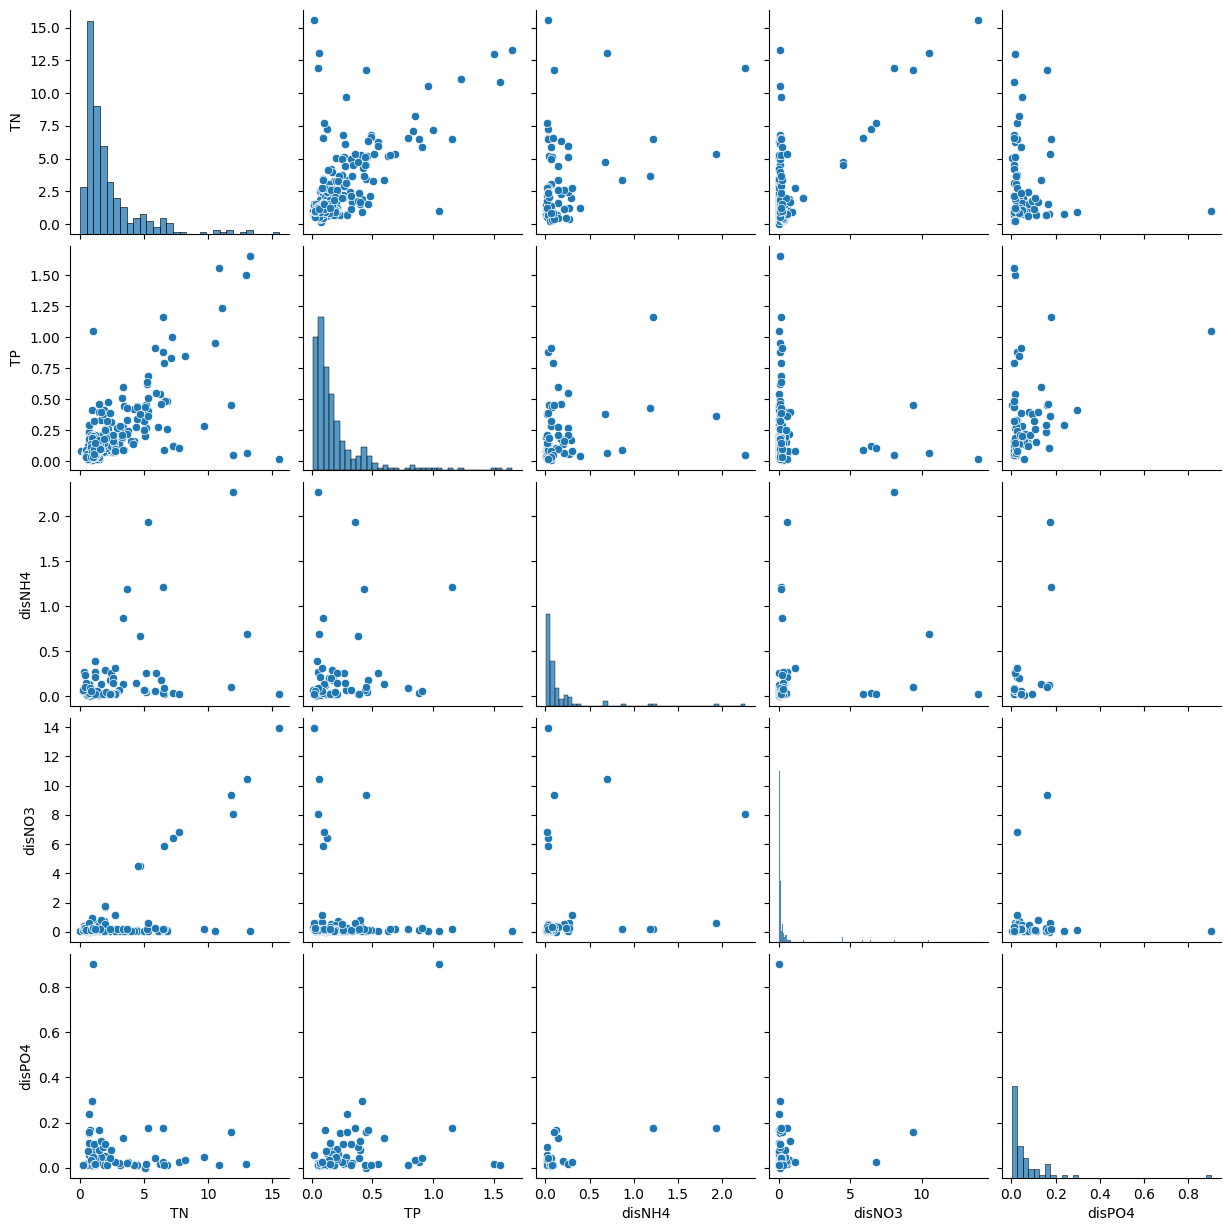

In [126]:
sns.pairplot((numeric_df.iloc[:,0:5]))

plt.show()

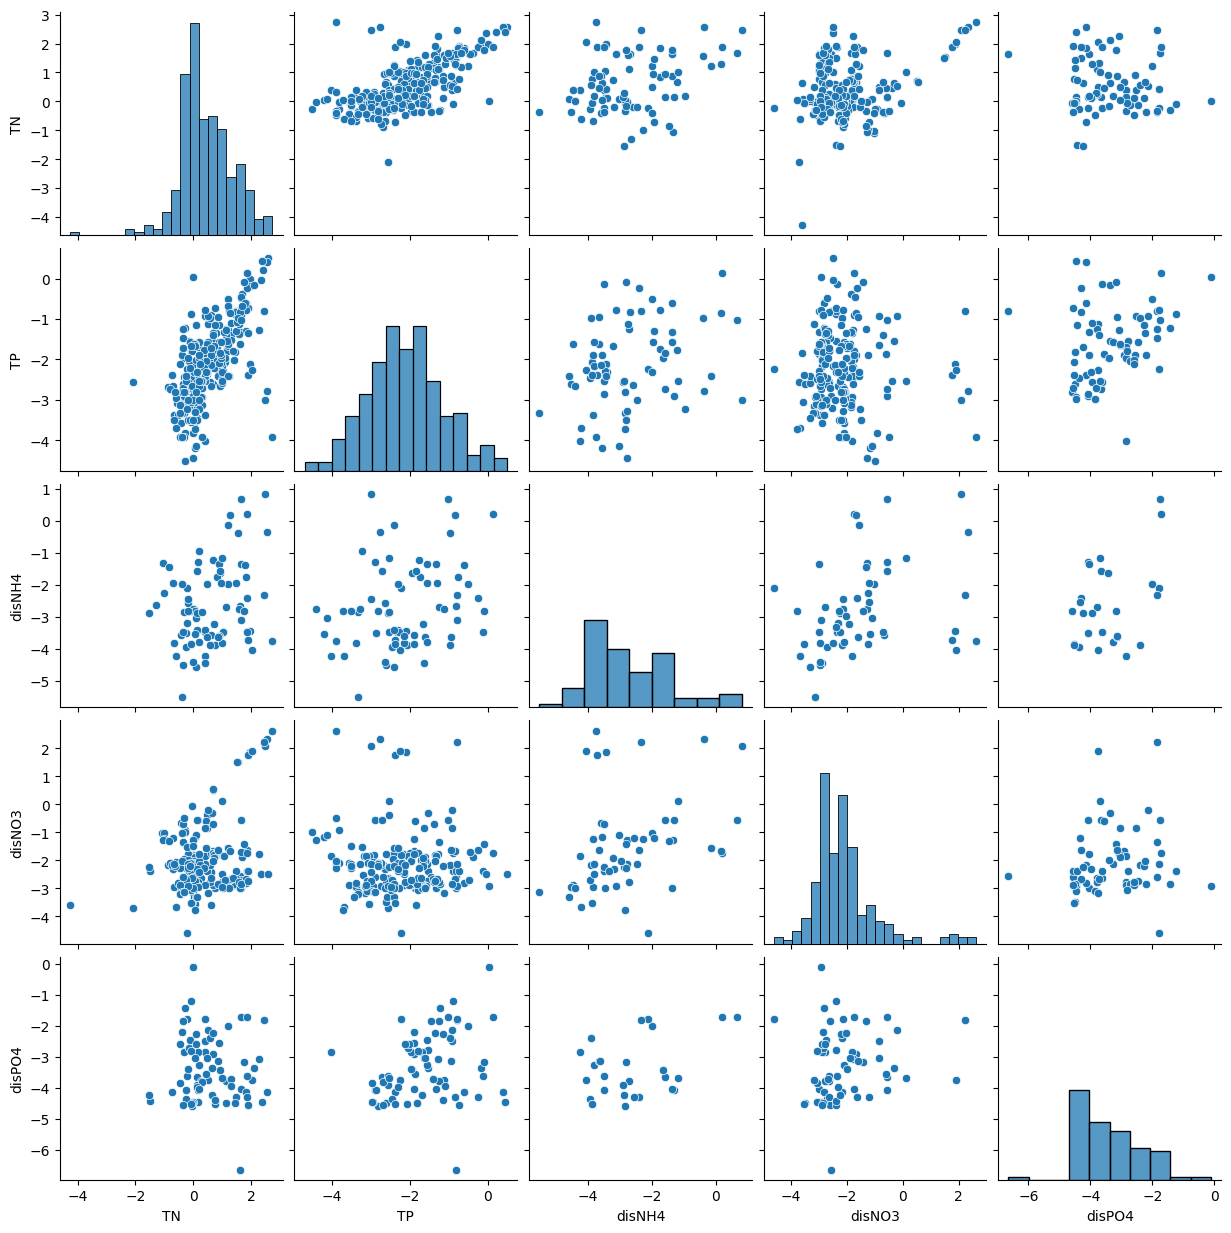

In [125]:
sns.pairplot(np.log(numeric_df.iloc[:,0:5]))

plt.show()

In [128]:
(np.log(numeric_df.iloc[:,0:5])).corr()

,TN,TP,disNH4,disNO3,disPO4
TN,1.000000,0.655037,0.319603,0.336729,-0.126521
TP,0.655037,1.000000,0.283567,-0.036152,0.267380
disNH4,0.319603,0.283567,1.000000,0.324389,0.402410
disNO3,0.336729,-0.036152,0.324389,1.000000,0.117412
disPO4,-0.126521,0.267380,0.402410,0.117412,1.000000


# Soil

In [3]:
df_soil= pd.read_csv('soil_clean_grouped.csv')

# df_soil.dtypes

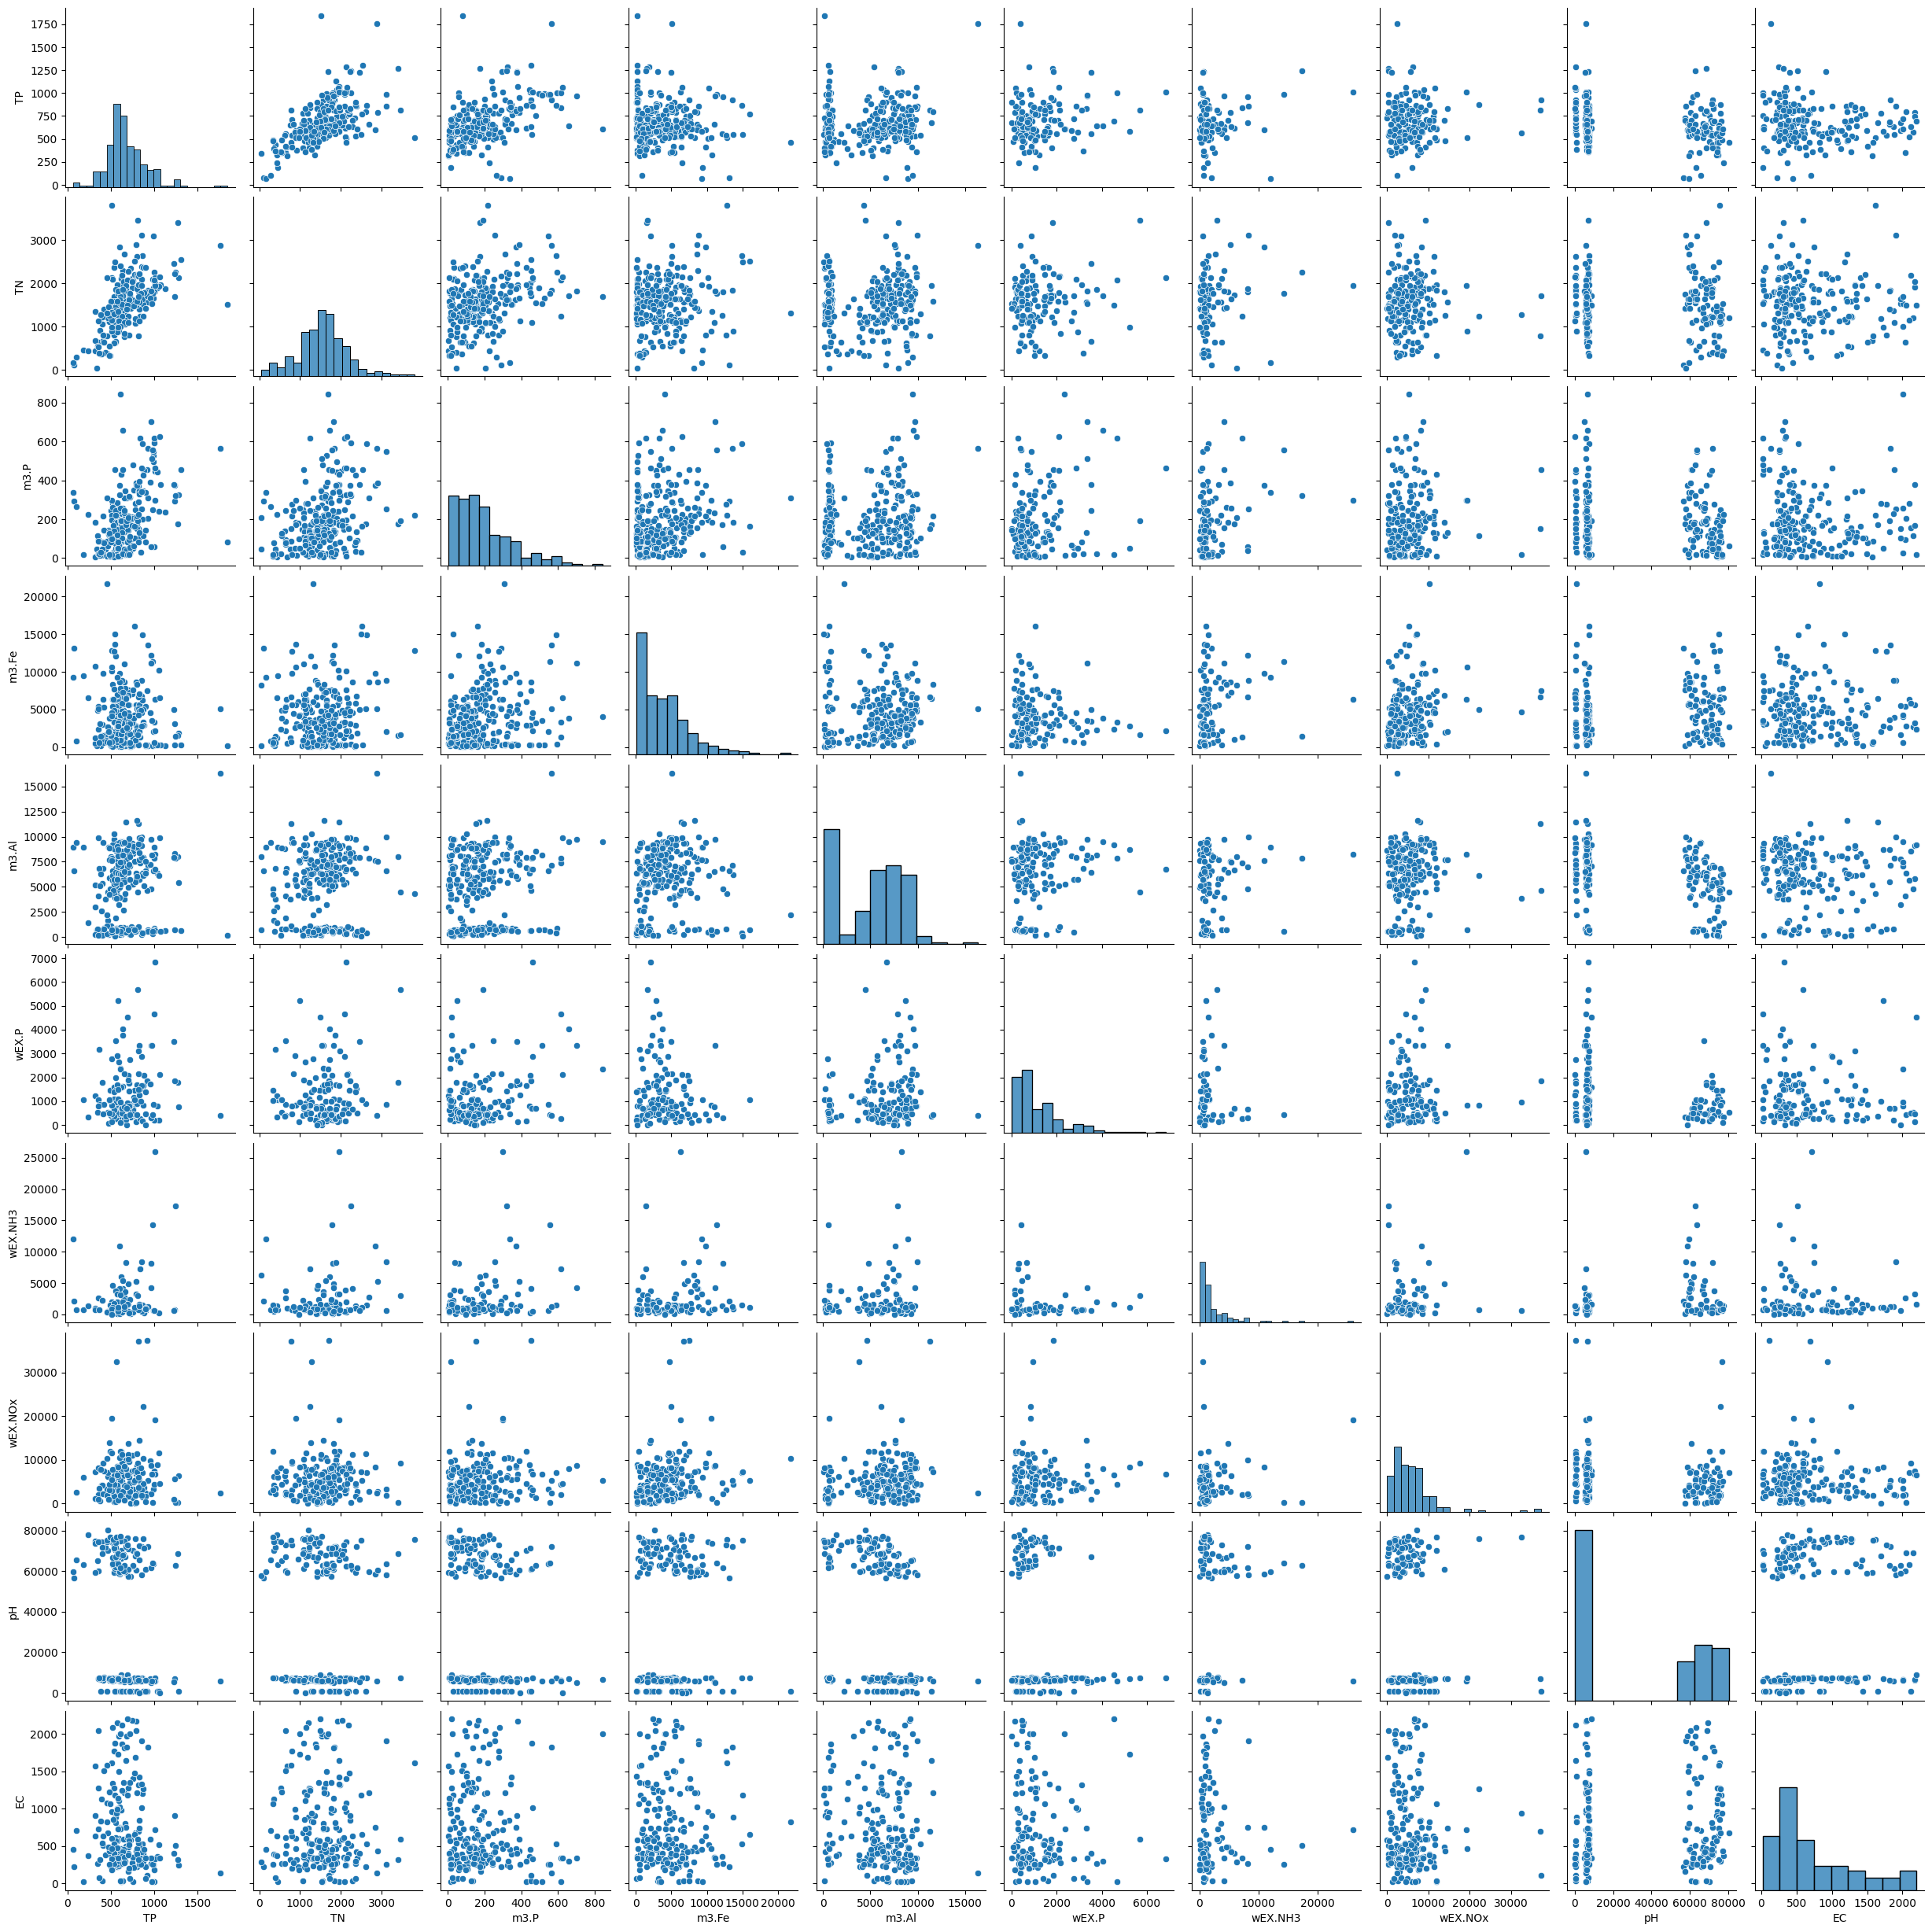

In [4]:
numeric_df_soil = (df_soil
                   .select_dtypes(include=['float64', 'int64'])[['TP', 'TN', 'm3.P',
       'm3.Fe', 'm3.Al', 'SPSC', 'wEX.P', 'wEX.NH3', 'wEX.NOx','pH', 'EC']])
sns.pairplot(numeric_df_soil[['TP', 'TN', 'm3.P',
       'm3.Fe', 'm3.Al', 'wEX.P', 'wEX.NH3', 'wEX.NOx','pH', 'EC']])
plt.show()

In [6]:
corr_soil = numeric_df_soil.corr()
corr_soil

,TP,TN,m3.P,m3.Fe,m3.Al,SPSC,wEX.P,wEX.NH3,wEX.NOx,pH,EC
TP,1.000000,0.584106,0.473772,-0.099038,0.109034,0.128123,0.178213,0.206943,0.064349,-0.244896,-0.096380
TN,0.584106,1.000000,0.340967,0.087023,0.100246,-0.019538,0.124314,0.144240,-0.028941,-0.101746,-0.003157
m3.P,0.473772,0.340967,1.000000,0.190090,0.103735,0.138914,0.214511,0.259149,0.053505,-0.143019,-0.071508
m3.Fe,-0.099038,0.087023,0.190090,1.000000,0.214280,-0.293646,-0.135132,0.161384,0.171646,0.048768,0.012177
m3.Al,0.109034,0.100246,0.103735,0.214280,1.000000,-0.377095,0.123604,0.111275,0.094871,-0.384307,-0.080089
SPSC,0.128123,-0.019538,0.138914,-0.293646,-0.377095,1.000000,-0.127636,-0.055366,0.028231,-0.234108,-0.084059
wEX.P,0.178213,0.124314,0.214511,-0.135132,0.123604,-0.127636,1.000000,-0.119853,0.055615,-0.246129,-0.073002
wEX.NH3,0.206943,0.144240,0.259149,0.161384,0.111275,-0.055366,-0.119853,1.000000,0.145886,0.123637,-0.096018
wEX.NOx,0.064349,-0.028941,0.053505,0.171646,0.094871,0.028231,0.055615,0.145886,1.000000,-0.145659,-0.063918
pH,-0.244896,-0.101746,-0.143019,0.048768,-0.384307,-0.234108,-0.246129,0.123637,-0.145659,1.000000,0.082168


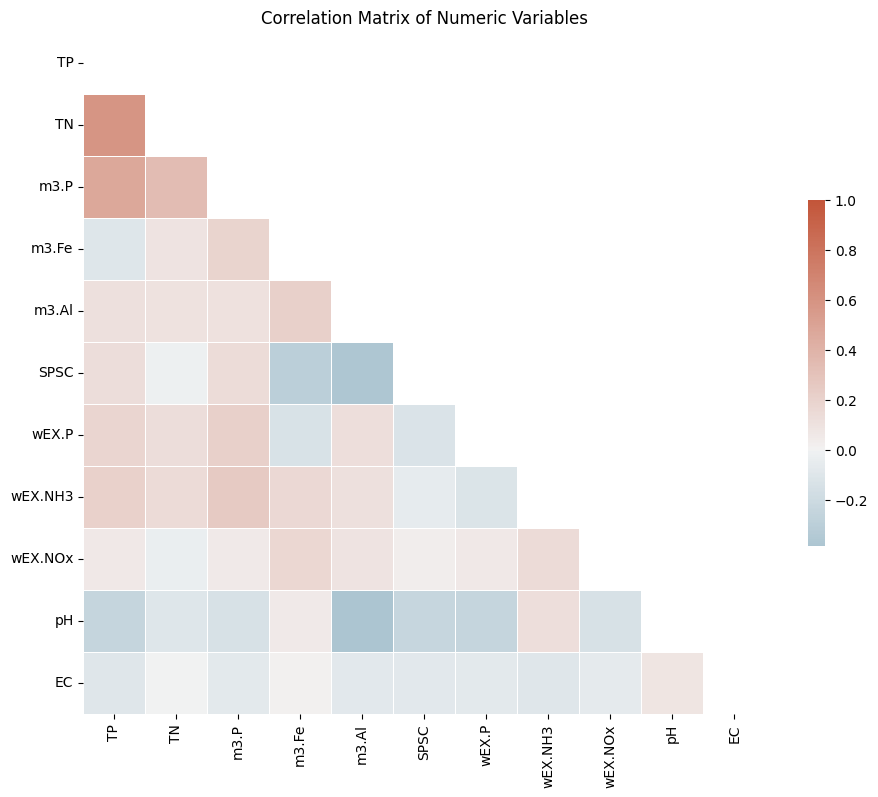

In [7]:

mask = np.triu(np.ones_like(corr_soil, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_soil, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

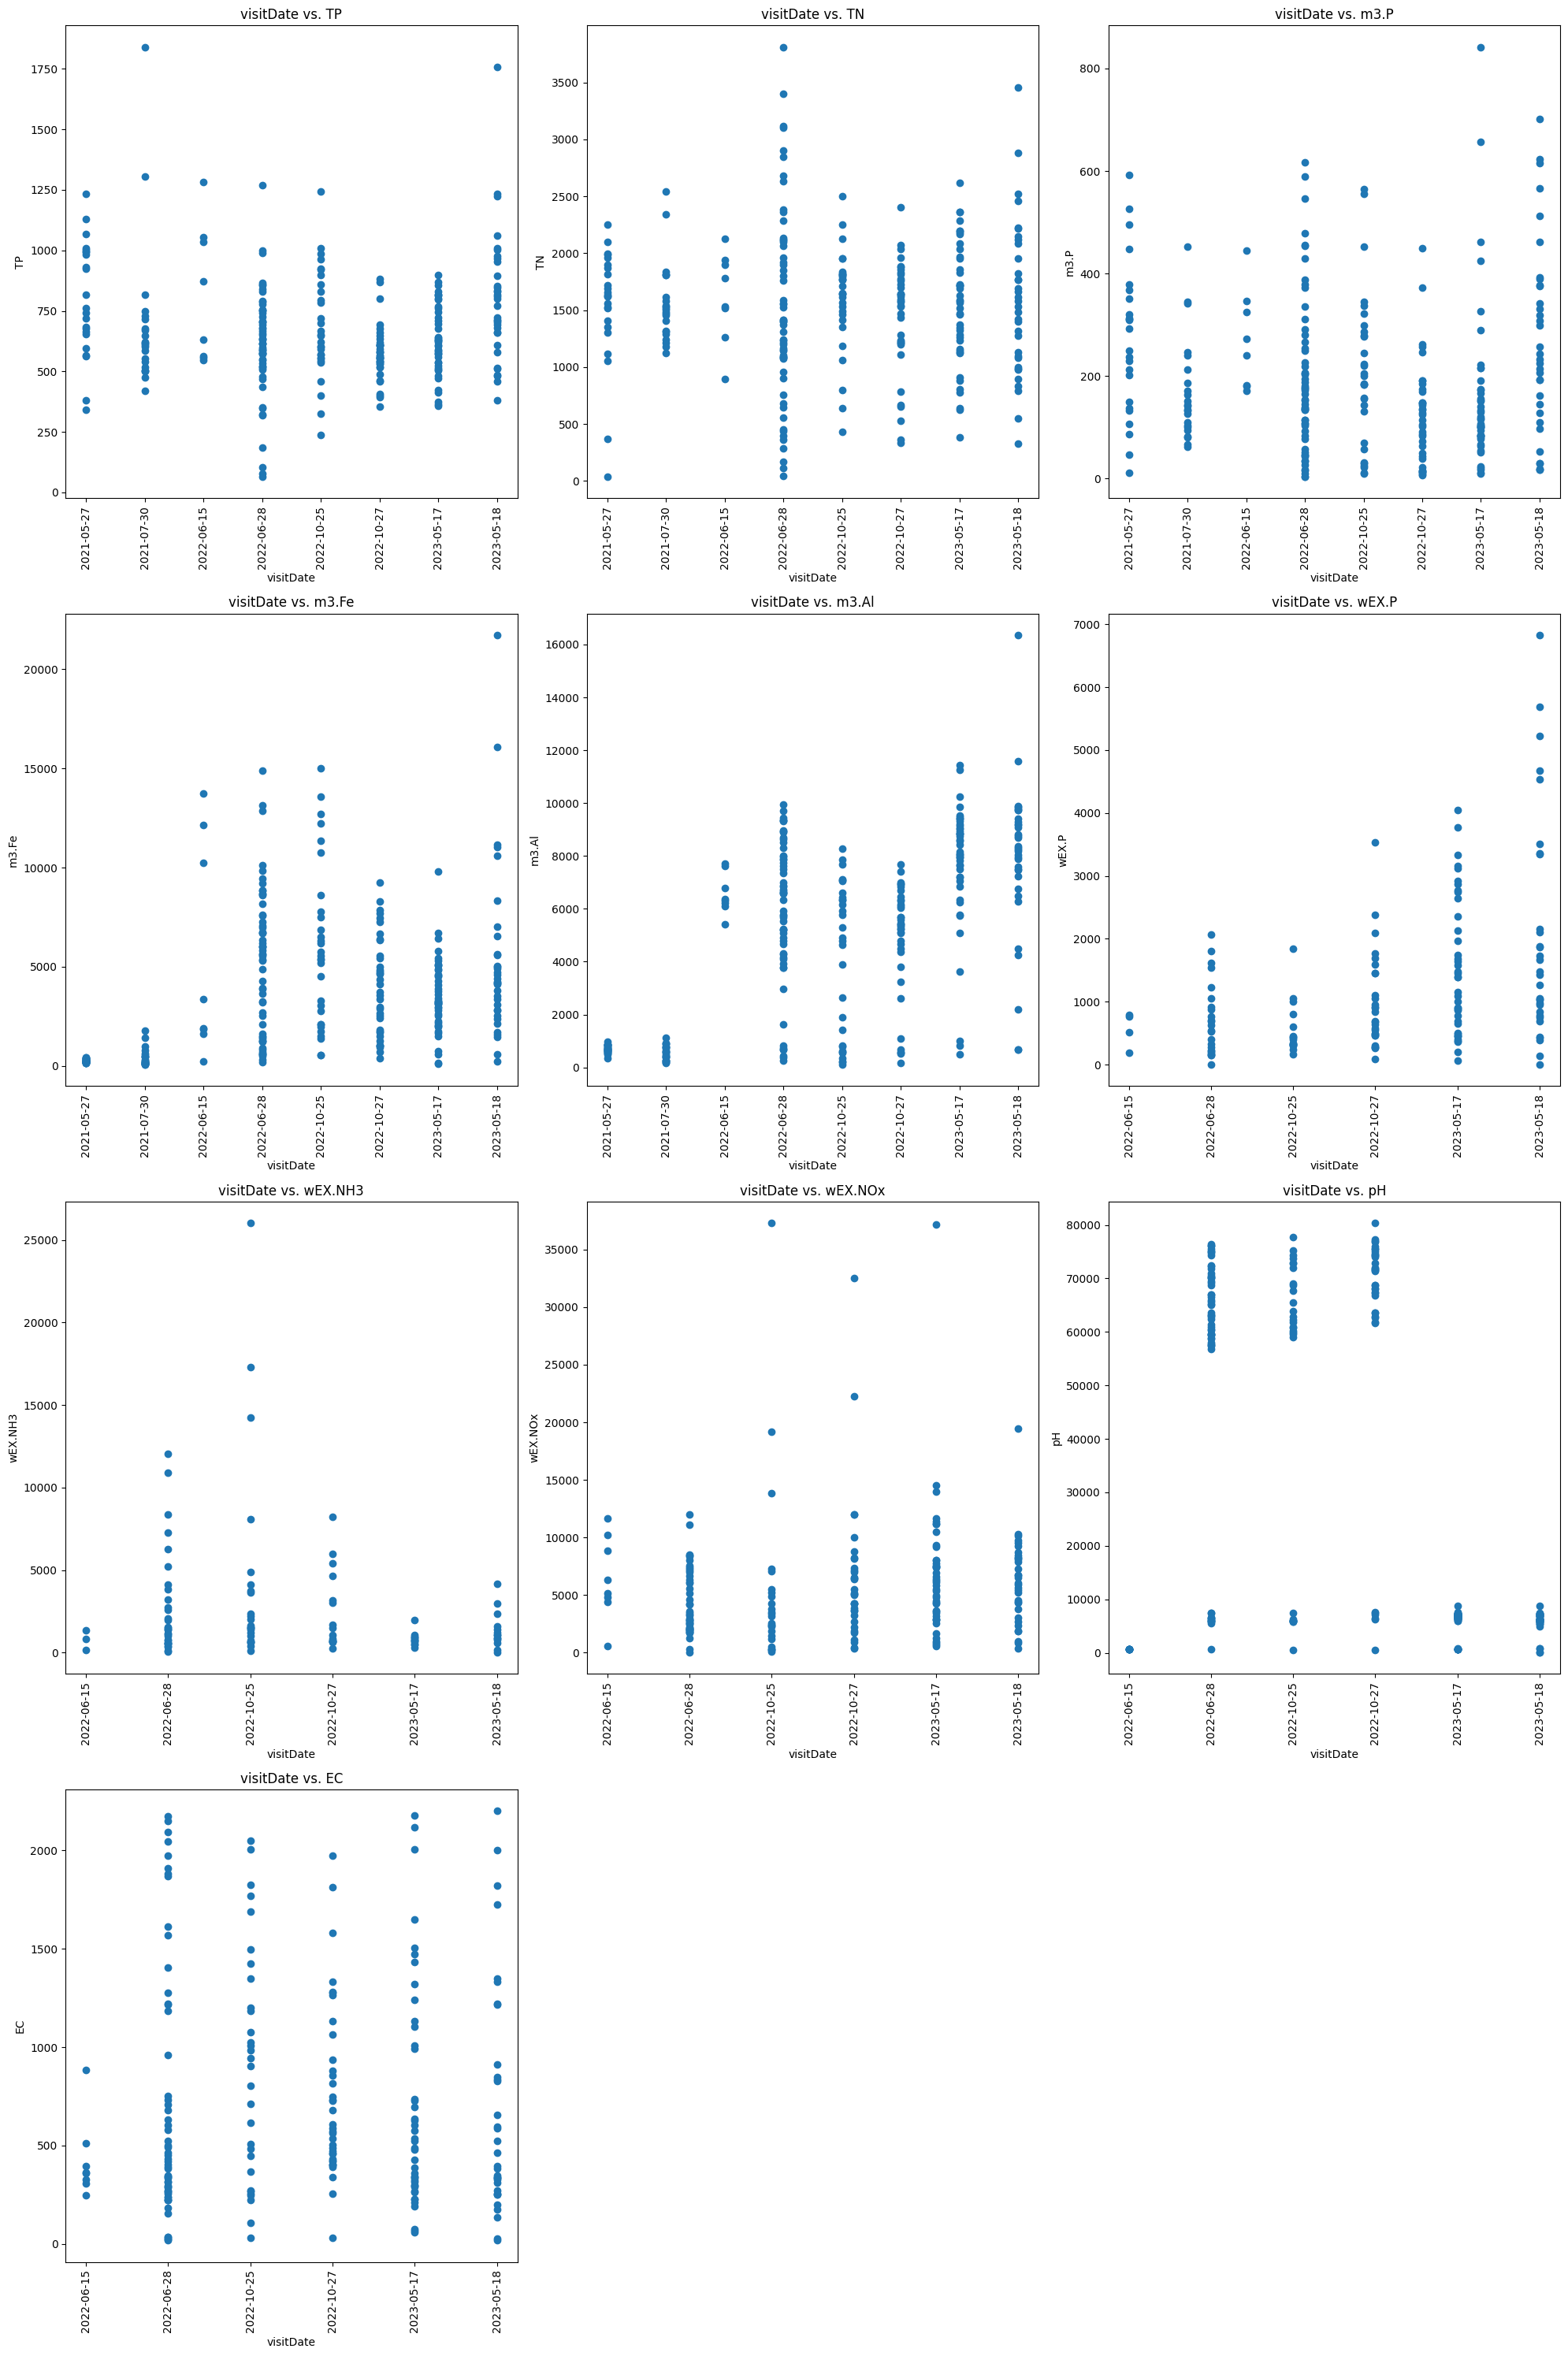

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cols= ["visitDate", 'TP', 'TN', 'm3.P',
       'm3.Fe', 'm3.Al', 'wEX.P', 'wEX.NH3', 'wEX.NOx','pH', 'EC']
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 30))
axes = axes.ravel()  

for idx, column in enumerate(df_soil[cols].columns[1:]):  
    axes[idx].scatter(df_soil[cols]['visitDate'], df_soil[cols][column])
    axes[idx].set_title(f'visitDate vs. {column}')
    axes[idx].set_xlabel('visitDate')
    axes[idx].set_ylabel(column)
    axes[idx].tick_params(axis='x', rotation=90)

for i in range(len(df_soil[cols].columns) - 1, len(axes)):
    fig.delaxes(axes[i])



plt.tight_layout()
plt.show()


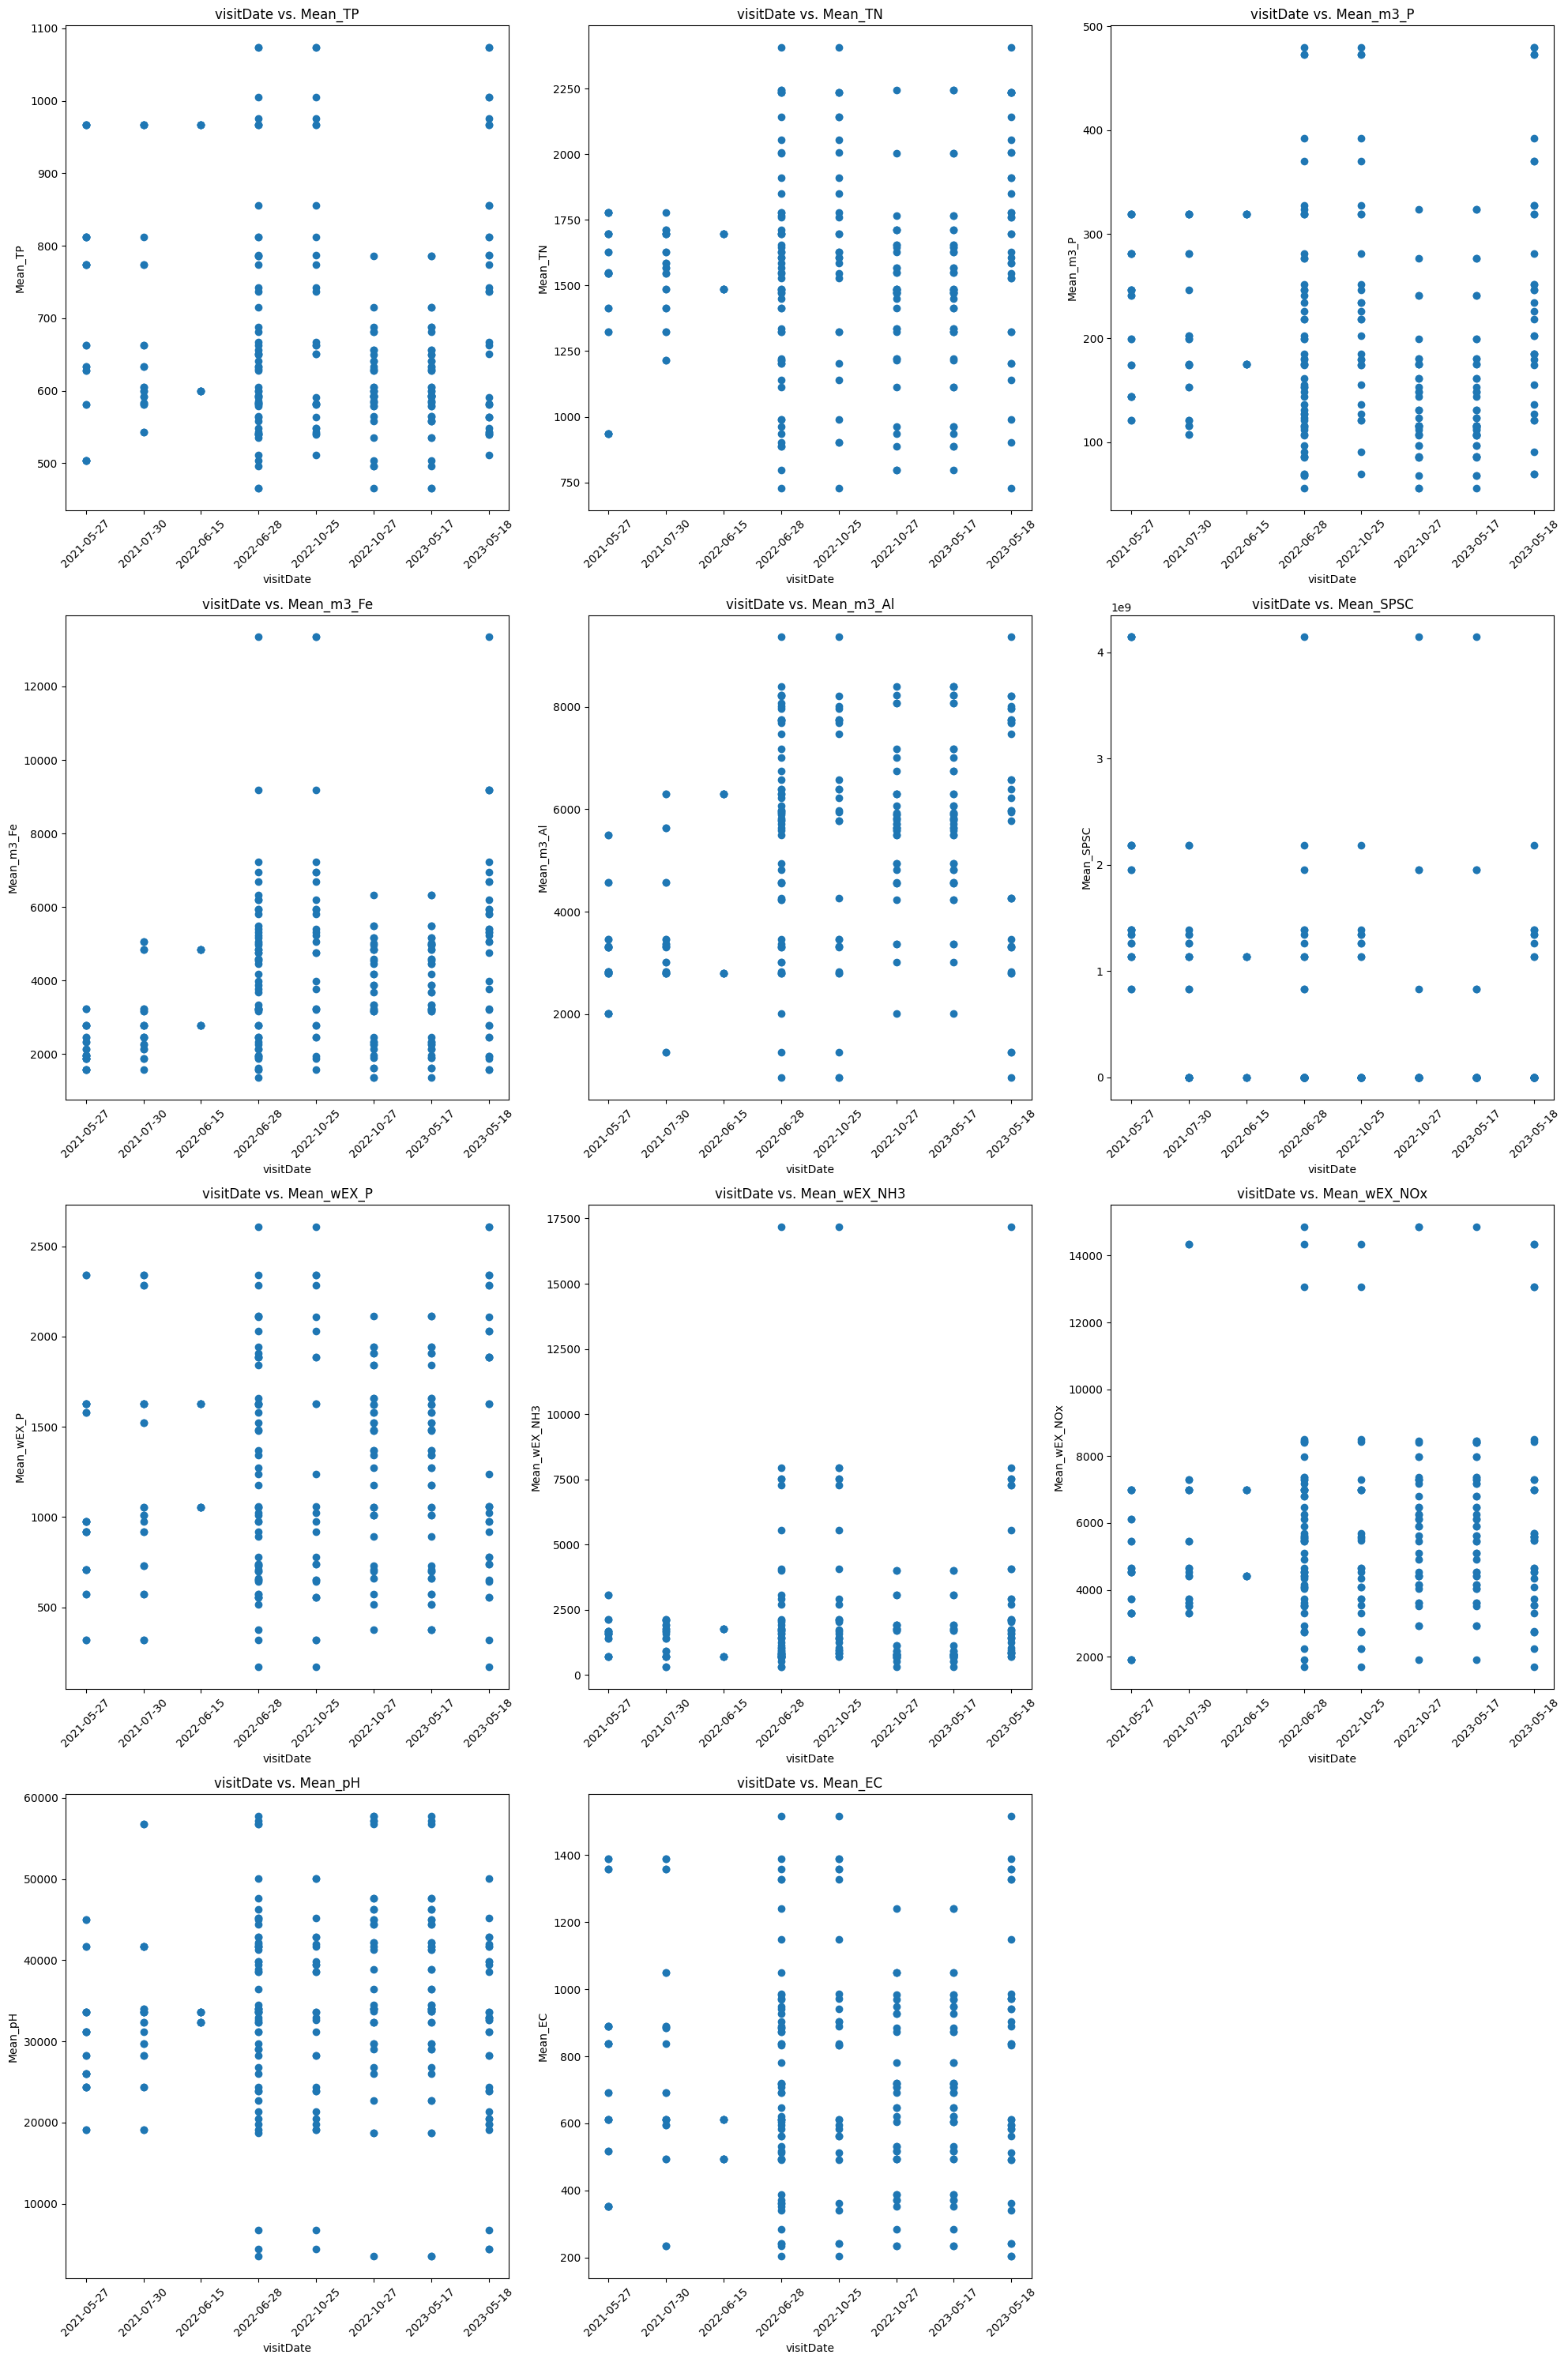

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cols_mean= ["visitDate", 'Mean_TP', 'Mean_TN', 
       'Mean_m3_P', 'Mean_m3_Fe', 'Mean_m3_Al', 'Mean_SPSC',
       'Mean_wEX_P', 'Mean_wEX_NH3', 'Mean_wEX_NOx',
       'Mean_pH', 'Mean_EC']
df_new = df_soil[cols_mean]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 30))
axes = axes.ravel()  

for idx, column in enumerate(df_new.columns[1:]):  
    axes[idx].scatter(df_soil[cols_mean]['visitDate'], df_new[column])
    axes[idx].set_title(f'visitDate vs. {column}')
    axes[idx].set_xlabel('visitDate')
    axes[idx].set_ylabel(column)
    axes[idx].tick_params(axis='x', rotation=45)

for i in range(len(df_new.columns) - 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

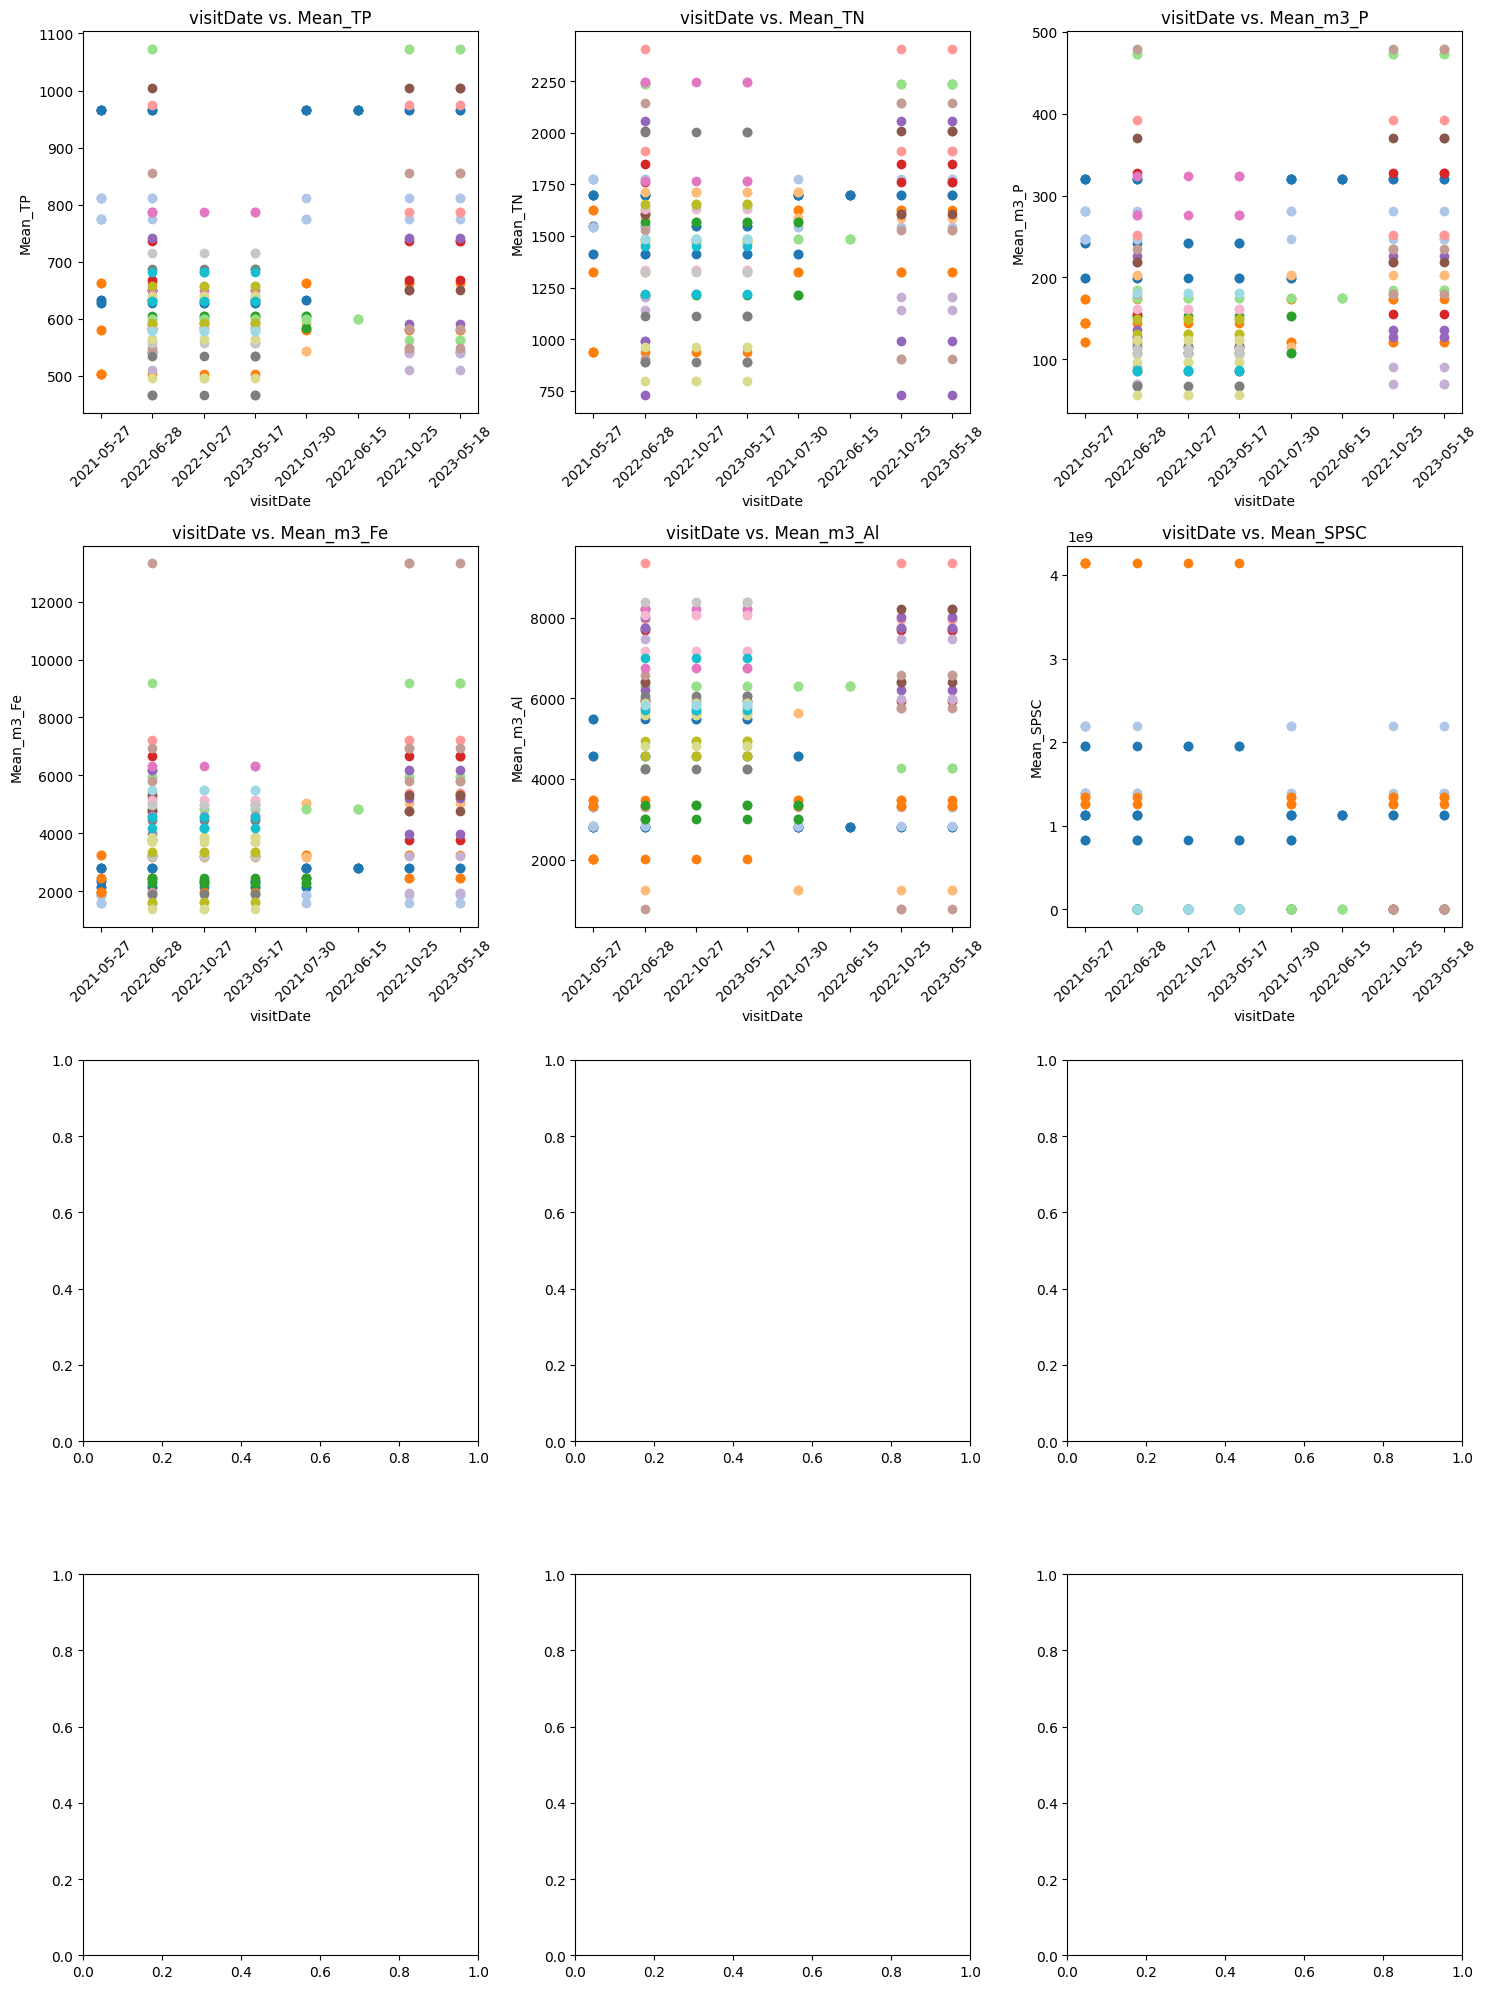

In [97]:
cols_mean= ["visitDate", 'locName', 'Mean_TP', 'Mean_TN', 
       'Mean_m3_P', 'Mean_m3_Fe', 'Mean_m3_Al', 'Mean_SPSC',
       'Mean_wEX_P', 'Mean_wEX_NH3', 'Mean_wEX_NOx',
       'Mean_pH', 'Mean_EC']
data = df_soil[["visitDate", 'locName', 'Mean_TP', 'Mean_TN', 
                'Mean_m3_P', 'Mean_m3_Fe','Mean_m3_Al', 'Mean_SPSC',
                ]]
locations = data['locName'].unique()
# locations = [f'Location_{i}' for i in range(len(unique_locations))]
colors = plt.cm.jet(np.linspace(0, 1, len(locations)))
# Creating a color map for the locations
color_map = {location: plt.cm.tab20(i/len(locations)) for i, location in enumerate(locations)}

# Plotting with points colored by location
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.ravel()

for idx, column in enumerate(data.columns[2:]):  # Excluding 'visitDate' and 'locName' from the columns
    for location in locations:
        subset = data[data['locName'] == location]
        axes[idx].scatter(subset['visitDate'], subset[column], label=location, color=color_map[location])
    axes[idx].set_title(f'visitDate vs. {column}')
    axes[idx].set_xlabel('visitDate')
    axes[idx].set_ylabel(column)
    axes[idx].tick_params(axis='x', rotation=45)

# Optional: Uncomment the following line if you want to add a legend
# axes[0].legend(loc='upper right')

# Remove empty plots
# for i in range(len(data.columns) - 2, len(axes)):
#     fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Archive

In [93]:
# !pip install dash dash-bootstrap-components pandas

In [9]:
# cols_mean= ["visitDate", 'locName', 'Mean_TP', 'Mean_TN', 
#        'Mean_m3_P', 'Mean_m3_Fe', 'Mean_m3_Al', 'Mean_SPSC',
#        'Mean_wEX_P', 'Mean_wEX_NH3', 'Mean_wEX_NOx',
#        'Mean_pH', 'Mean_EC']
cols_mean= ["visitDate", 'locName', 'Mean_TP', 'Mean_TN', 
       'Mean_m3_P', 'Mean_m3_Fe', 'Mean_m3_Al', 'Mean_SPSC']
data = df_soil[["visitDate", 'locName', 'Mean_TP', 'Mean_TN', 
                'Mean_m3_P', 'Mean_m3_Fe','Mean_m3_Al', 'Mean_SPSC',
                ]]
locations = [
    'Aurand Run connection to P1', 'Aurand Run downstream', 'Aurand Run upstream',
    'Wetland Pool 1', 'Wetland Pool 10', 'Wetland Pool 11', 'Wetland Pool 12',
    'Wetland Pool 13', 'Wetland Pool 14', 'Wetland Pool 15', 'Wetland Pool 16',
    'Wetland Pool 17', 'Wetland Pool 18', 'Wetland Pool 19', 'Wetland Pool 2',
    'Wetland Pool 20', 'Wetland Pool 21', 'Wetland Pool 22', 'Wetland Pool 23',
    'Wetland Pool 24', 'Wetland Pool 25', 'Wetland Pool 26', 'Wetland Pool 27',
    'Wetland Pool 28', 'Wetland Pool 29', 'Wetland Pool 3', 'Wetland Pool 30',
    'Wetland Pool 31', 'Wetland Pool 32', 'Wetland Pool 33', 'Wetland Pool 34',
    'Wetland Pool 35', 'Wetland Pool 36', 'Wetland Pool 37', 'Wetland Pool 38',
    'Wetland Pool 39', 'Wetland Pool 4', 'Wetland Pool 40', 'Wetland Pool 41',
    'Wetland Pool 42', 'Wetland Pool 43', 'Wetland Pool 5', 'Wetland Pool 6',
    'Wetland Pool 7', 'Wetland Pool 8', 'Wetland Pool 9'
]
variables = cols_mean[2:]
# locations

In [10]:
import dash
from dash import dcc, html, Input, Output
import plotly.graph_objects as go
import pandas as pd
import numpy as np

app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    dcc.Dropdown(
        id='location-dropdown',
        options=[{'label': loc, 'value': loc} for loc in locations],
        value=locations[0]  # default value
    ),
    dcc.Graph(id='scatter-plot')
])

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('location-dropdown', 'value')]
)
def update_graph(selected_location):
    filtered_data = data[data['locName'] == selected_location]

    fig = go.Figure()
    for var in variables:
        fig.add_trace(go.Scatter(x=filtered_data['visitDate'], y=filtered_data[var], mode='markers', name=var))
    
    fig.update_layout(title=f'Scatter Plots for {selected_location}', xaxis_title='visitDate', yaxis_title='Value')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
